In [2]:
# from faerun import Faerun

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from rdkit import Chem

from tqdm.notebook import tqdm

RDKit WARNING: [21:03:23] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
from tqdm.contrib.concurrent import process_map

### load relevant data

In [6]:
molprops = pd.read_csv("../data_files/acid_amine_stable.txt")

In [7]:
umap_stats = np.load("./computed_umap_data/umap_acid_amine_33_nn_10.npy")
molprops["x"] = umap_stats[:,0]
molprops["y"] = umap_stats[:,1]

In [8]:
otherprops = pd.read_csv("../data_files/acid_amine_smiles_mindist_dbank.csv",index_col=0)
otherprops.head()

,smiles,min_dist_all,natoms,drugbank_matches
0,COON,6.0,4,0
1,CONO,6.0,4,18
2,CON=O,7.0,4,19
3,NOCO,4.0,4,4
4,C1ONO1,5.0,4,0


In [9]:
match_dict = {}
for r in otherprops.itertuples():
    match_dict[r.smiles] =  r.drugbank_matches

In [10]:
molprops = molprops[molprops.smiles.isin(otherprops.smiles)].copy()

In [11]:
molprops["matches"] = [match_dict[s] for s in molprops.smiles]

In [12]:
molprops["matches_capped"] = np.minimum(np.array(molprops.matches),100)

In [13]:
molprops.sort_values("matches_capped",inplace=True,ascending=True)

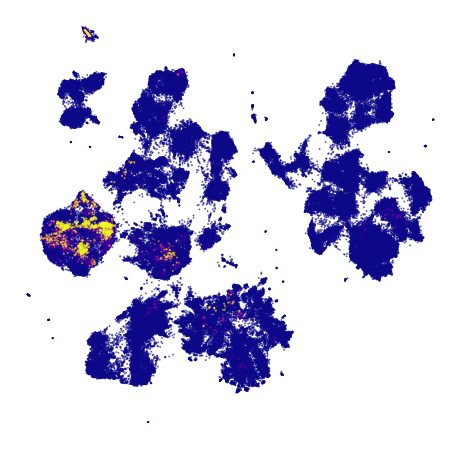

In [14]:
plt.figure(figsize=(8,8),frameon=False)
plt.scatter(molprops.x, molprops.y,c=molprops.matches_capped,cmap="plasma",s=1,alpha=0.5)
ax=plt.gca()
ax.axis("off")
# plt.savefig("../umap_900_8.png",dpi=900)
pass